# Data Mining Part-1<br>


## The Story
Deutsche Welle (DW) is a German international broadcaster that operates television, radio, and online services.

 - **News Coverage**: Deutsche Welle covers a wide range of news topics, including international affairs, politics, business, science, technology, culture, and sports. The news coverage aims to provide a balanced and comprehensive view of global events.<br>


 - **Global Perspectives**: Deutsche Welle is known for offering diverse perspectives on global issues. The organization aims to present news and information from an international viewpoint, fostering a better understanding of different cultures and opinions.<br>

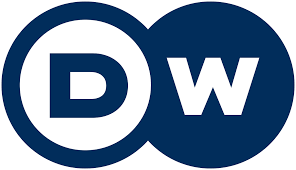
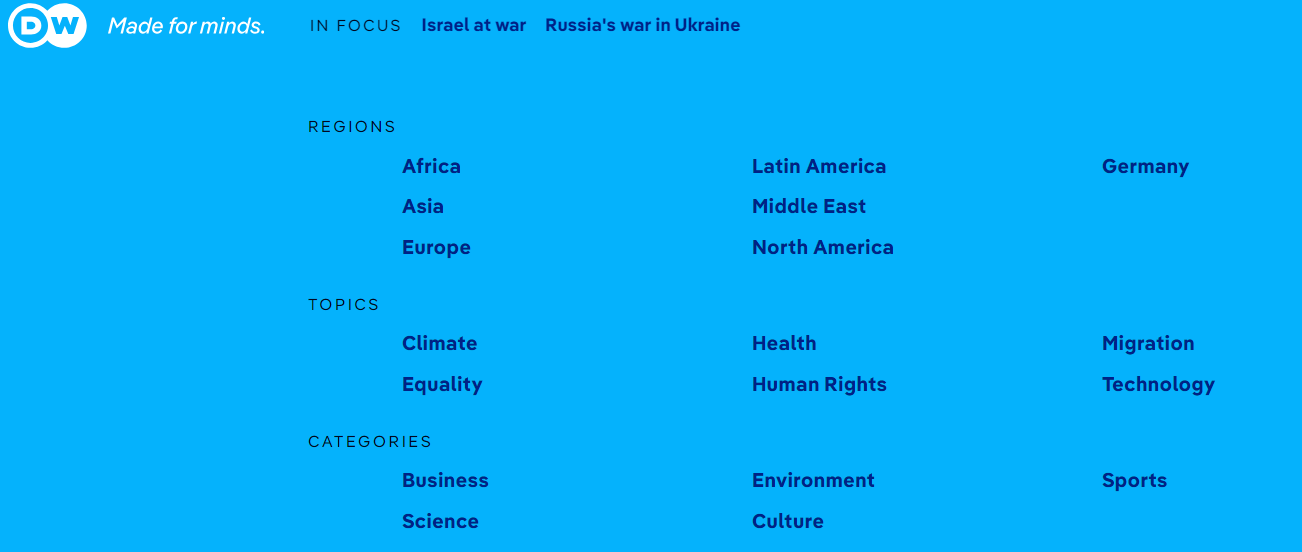

*****************************************

In this project, our goal is to analyze various features of DW.com. To achieve this, we initially collect a dataset comprising news articles published from October 1, 2023, to May 31, 2024. The key attributes extracted for each article include:

- *Link*: The actual URL of the article.
- *Publication_Date*: The date of publication of the article.
- *Category*: The classification of the article, such as Politics, Conflict, Science, Culture, etc.
- *Region*: The geographical region to which the news is related, such as US, Germany, Europe, Asia, India, China, etc.
- *Title*: The headline of the article.
- *Text*: The complete text content of the article.
- *Summary*: A concise summary of the article.
- *Sub-heading*: If the article is written, the sub-headings used within it.
- *Related-Topics*: The related topics provided at the end of each article, assisting readers in exploring further related subjects.

******************************************

***Tasks***<br>

The primary objective of this project is to identify and examine the correlation among the *Region*, *Category*, and *Related Topics*. Our hypothesis posits that DW highlights genuine global issues across various categories and regions without bias. This aligns with DW's overarching mission of disseminating news from around the world to every individual, emphasizing their commitment to providing comprehensive coverage without discrimination.

In substantiating our hypothesis, we postulated that critical roles should be played by features such as *Region* and *Category*. Our approach involves employing Graph Mining techniques, utilizing the NetworkX packages. This methodology allows us to extract information regarding various graph properties, identify central measures, and perform link prediction.


## The Data

We analyzed the website "https://www.dw.com/search/?languageCode=en" using Python library *BeautifulSoup* to extract the essential attributes highlighted in **The Story**

In [4]:
'''                       Read The News Articles Dataset of DW
'''
import pandas as pd
df = pd.read_excel('New_dw_news_output.xlsx')
print ('Number of Articles avaialable on given Dataset :', len(df['Link']))
df.head()

Number of Articles avaialable on given Dataset : 9271


,Link,Publication_Date,Category,Region,Title,Summary,Text,SubHeadings,Related_topics
0,https://www.dw.com/en/clashes-as-senegal-leade...,2024-02-05,Politics,Senegal,Clashes as Senegal leader delays vote,\nOpposition leaders in Senegal have condemned...,Opposition leaders in Senegal have condemned a...,[],[]
1,https://www.dw.com/en/germany-vows-security-su...,2024-02-05,Politics,Kosovo,Germany vows security support amid Kosovo-Serb...,\nGerman Defense Minister Boris Pistorius has ...,German Defense Minister Boris Pistorius has ca...,"['What is behind the latest tension?', 'Kosovo...",[]
2,https://www.dw.com/en/germanys-scholz-pledges-...,2024-02-05,Society,Germany,Germany's Scholz pledges solidarity with migra...,\nGerman Chancellor Olaf Scholz has praised pu...,German Chancellor Olaf Scholz has praised publ...,"['Protests against far-right\xa0', 'Germans ra...",[]
3,https://www.dw.com/en/britains-king-charles-ii...,2024-02-05,Society,United Kingdom,Britain's King Charles III diagnosed with cancer,\nBritain's King Charles III will take a break...,Britain's King Charles III will take a break f...,[],[]
4,https://www.dw.com/en/senegal-why-has-presiden...,2024-02-05,Politics,Senegal,Senegal: Why has President Macky Sall postpone...,\nSenegal's President Macky Sall's announcemen...,Senegal's President Macky Sall's announcement ...,[],[]


In [5]:
'''             Data type of the Following Attributes
'''
df.dtypes

Link                        object
Publication_Date    datetime64[ns]
Category                    object
Region                      object
Title                       object
Summary                     object
Text                        object
SubHeadings                 object
Related_topics              object
dtype: object

In [6]:
'''                     Basic Cleaning
'''
print (f"The length of Data before cleaning : {len(df['Link'])}")
df = df[(df['Category'] != 'Unknown') & (df['Region'] != 'Unknown')]
df = df.dropna(subset=['Category', 'Region']) 
print (f"The length of Data after cleaning : {len(df['Link'])}")


The length of Data before cleaning : 9271
The length of Data after cleaning : 9146


## Initial Data Analysis <br>
Initial Data Analysis: In this phase, we aim to visualize fundamental plots to glean insights from the dataset's internal dynamics.

- *Time Series*: Illustrates the daily count of published articles within the specified timeframe.
- *Category Bar Plot*: Displays the top 10 categories with the highest article count.
- *Region Bar Plot*: Exhibits the top 10 regions with the highest frequency of articles.
- *Region-Category Bar Plot*: Highlights the most frequent combinations of regions and their corresponding categories.
- *Heat Map*: Depicts the top 20 counts of related topics over the given time period.

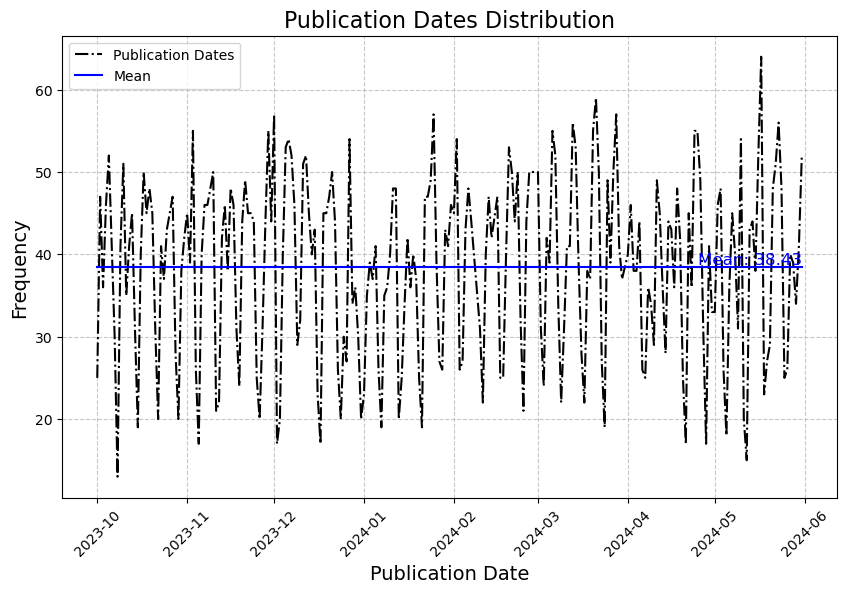

In [7]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

dates = df['Publication_Date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(dates.index, dates, 'k-.', label='Publication Dates')
plt.plot(dates.index, [np.mean(dates)] * len(dates), 'b-', label='Mean')

plt.title('Publication Dates Distribution', fontsize=16)
plt.xlabel('Publication Date', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.7)

plt.text(dates.index[-1], np.mean(dates), f'Mean: {np.mean(dates):.2f}', ha='right', va='bottom', color='blue', fontsize=12)
plt.legend()
plt.show()


#### Discussion:

The daily count of published articles fluctuates, ranging from a minimum of 5 to a maximum of 65. On average, there are 39 articles published each day. The patterns of highs and lows in the number of articles exhibit weekly variations.

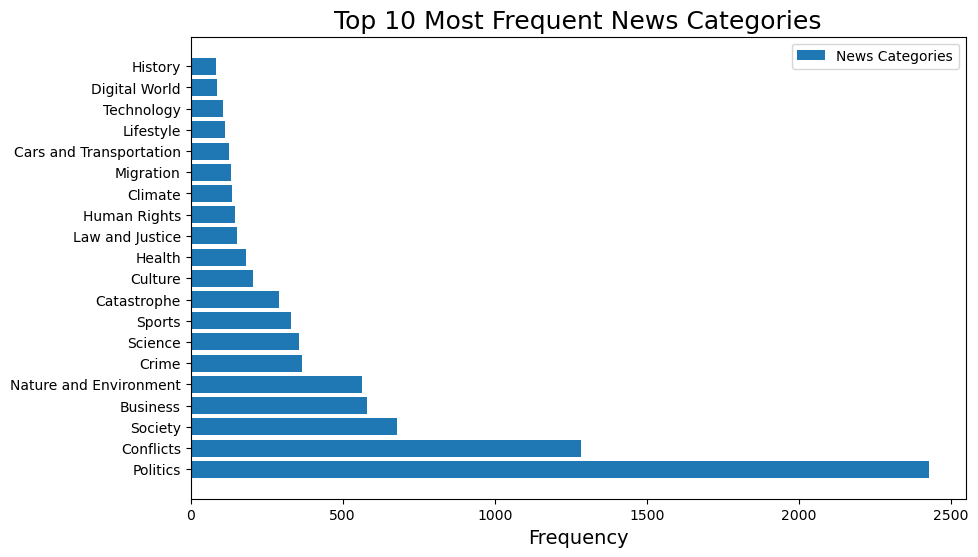

In [8]:
plt.figure(figsize=(10, 6))
categories = df['Category'].value_counts().head(20)
plt.barh(categories.index, categories, label='News Categories')
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 10 Most Frequent News Categories', fontsize=18)
plt.legend()
plt.show()

#### Discussion:

Among the 9146 articles, the predominant categories are Politics and Conflicts, collectively constituting over 40% of all article classifications.

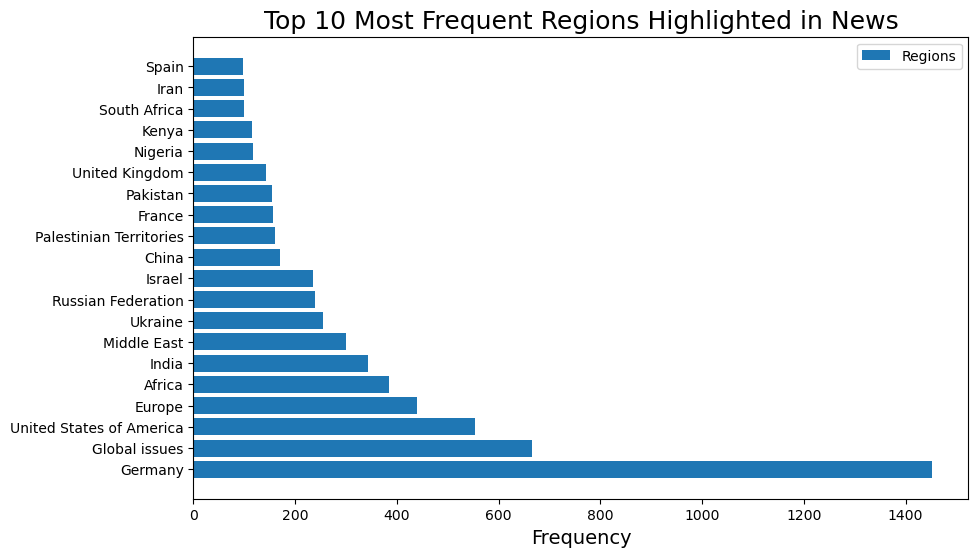

In [9]:
plt.figure(figsize=(10, 6))
regions = df['Region'].value_counts().head(20)
plt.barh(regions.index, regions, label='Regions')
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 10 Most Frequent Regions Highlighted in News', fontsize=18)
plt.legend()
plt.show()

#### Discussion:

Germany is a constant presence in news articles, accounting for 15% of regional mentions. However, other regions surge in prominence during particular periods, such as the recent surge in coverage of the Israel-Palestine conflict and the war in Ukraine.

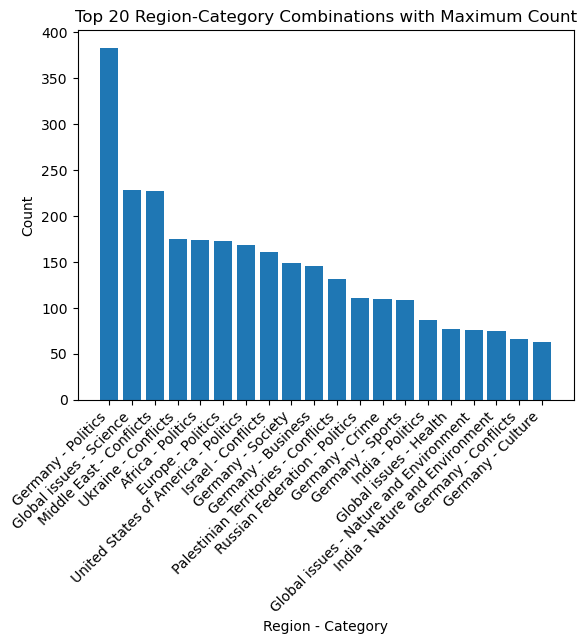

In [10]:
# Find the counts of each group
group_counts = df.groupby(['Region', 'Category']).size().reset_index(name='Count')
sorted_counts = group_counts.sort_values(by='Count', ascending=False)
top_20 = sorted_counts.head(20)

# Plot 'Region' and 'Category' with the maximum count
plt.bar(top_20['Region'] + ' - ' + top_20['Category'], top_20['Count'])
plt.xlabel('Region - Category')
plt.ylabel('Count')
plt.title('Top 20 Region-Category Combinations with Maximum Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Discussion

In our analysis, we grouped regions with their respective categories, revealing that *Germany - Politics* is the most prevalent theme in news articles. Following closely is *Global issues - Science* as the second most prominent category. Subsequent distributions show a gradual decrease.

In [11]:
'''                 Reformat the *Related_topics* from string to List
'''
import re
def parse_json(x):
    match = re.search(r'\[\'([^\']*)\'\]', x)
    if match:
        my_list = [str(item.strip()) for item in match.group(1).split(',')]
        return my_list
    
df['Related_topics_list'] = df['Related_topics'].apply(parse_json)
#print (df['Related_topics_list'])

In [12]:

'''                         Re-datatype the Publication_Date 
'''
print ('Before adjust the format of Dates : ', df['Publication_Date'][0])
df['Publication_Date'] = df['Publication_Date'].dt.date
print ('After adjust the format of Dates : ', df['Publication_Date'][0])

Before adjust the format of Dates :  2024-02-05 00:00:00
After adjust the format of Dates :  2024-02-05


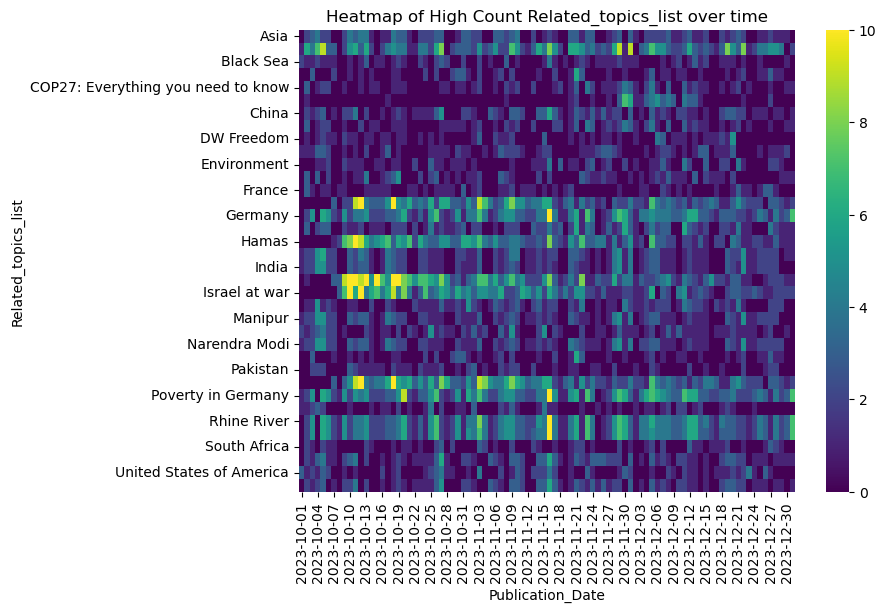

In [13]:
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import json
def heatmap(variable, count_threshold):
    explode_variable = df.explode(variable)
    counts = explode_variable[variable].value_counts()
    count_threshold = count_threshold  

    high_count_values = counts[counts > count_threshold].index
    filtered_df = explode_variable[explode_variable[variable].isin(high_count_values)]
    cross_tab_filtered = pd.crosstab(filtered_df[variable], filtered_df['Publication_Date'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(cross_tab_filtered, annot=False, cmap='viridis', fmt='d', vmin=0, vmax=10)
   # plt.colorbar(cax=None, ax=None, cbar_kws={"ticks":[]})  # Set ticks to an empty list to remove axis values
    plt.title('Heatmap of High Count '+ variable+' over time')
    plt.show()
heatmap('Related_topics_list', 60)

#### Discussion:

The heatmap depicting the count of the top 20 *Related Topics* indicates that *Israel* and *Israel at war* consistently exhibited high frequency from October 10, 2023, to October 19, 2023. During the same period, topics related to *Hamas* and *Palestinian territories* were also prominent. The topic of *BRICS* appears to be a recurrent discussion approximately once every month. On November 15, 2023, the subjects of *Poverty in Germany* and *Mr. Robert Habeck* were also addressed.

## Graph Properties
Bring the dataset into the form that you need for the experiments.

   • Compute and explore various graph properties and interpret the results.


##### Implement the attributes of *Region* and *Category*  

In [16]:
import pandas as pd
import itertools
import networkx as nx
from d3graph import d3graph, vec2adjmat

In [17]:
pairs = [(df.iloc[i]['Region'], df.iloc[i]['Category']) for i in range(len(df))]

In [20]:

def nodes_edges_subgraph(pairs, x, y, degrees):
    Pairs = pd.DataFrame(pairs, columns=[x, y])
    print ('Total length of the connections between Region and Category is : ',len(Pairs[x]))
    print (50*'*')
    # Count occurrences of unique pairs
    edges = pd.DataFrame(pairs, columns=[x, y]).groupby([x, y]).size().reset_index(name='weight')

    # Creating a network graph using NetworkX
    G = nx.from_pandas_edgelist(edges, x, y, 'weight')

    # subgraphing
    subgraph = G.subgraph([node for node, degree in G.degree(weight='weight') if degree > degrees])  

    num_nodes_subgraph = subgraph.number_of_nodes()
    print("Number of nodes in the subgraph:", num_nodes_subgraph)

    num_edges_subgraph = subgraph.number_of_edges()
    print("Number of edges in the subgraph:", num_edges_subgraph)
    print (50*'*')

    subgraph_edges = pd.DataFrame(subgraph.edges(data="weight"), columns=["source", "target", "n"])
    adjmat = vec2adjmat(subgraph_edges.source, subgraph_edges.target, subgraph_edges.n)
    d3 = d3graph()
    d3.graph(adjmat)
    d3.show()
    return subgraph

In [21]:
'''                         For NetworkX analysis, first we implement the "Region" and "Category" attributes
'''
region_category_network = nodes_edges_subgraph(pairs, 'Region', 'Category', 20) 
region_category_network

Total length of the connections between Region and Category is :  9146
**************************************************
Number of nodes in the subgraph: 105
Number of edges in the subgraph: 1002
**************************************************


In [24]:
'''             Degree Distribution & Wordcloud of Nodes
'''
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
def degree_distribution(subgraph):
    # Calculate degree distribution
    degrees = [degree for _, degree in subgraph.degree()]
    nodes = [node for node in subgraph.nodes()]
    
    # Plot degree distribution
    plt.hist(degrees, bins='auto', color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel('Degree')
    plt.ylabel('# of Nodes')
    plt.title('Degree Distribution')
    plt.legend()
    plt.show()
    
    #***********************************************************************************
    # Wordcloud of Nodes
    
    # First convert two lists into Dataframe
    nodes_degrees = pd.DataFrame(
        {'Nodes': nodes,
         'Degrees': degrees
        }
    )
    # Combine the words and their corresponding values into a dictionary
    word_values_dict = dict(zip(nodes_degrees['Nodes'], nodes_degrees['Degrees']))
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_values_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Node Degree Distribution Wordcloud', fontsize=30)
    plt.axis('off')
    plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


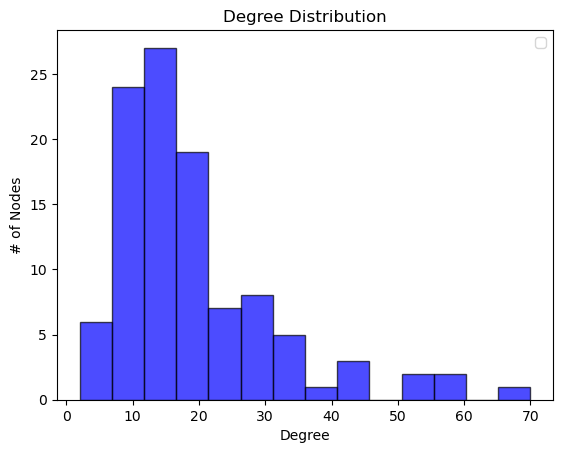

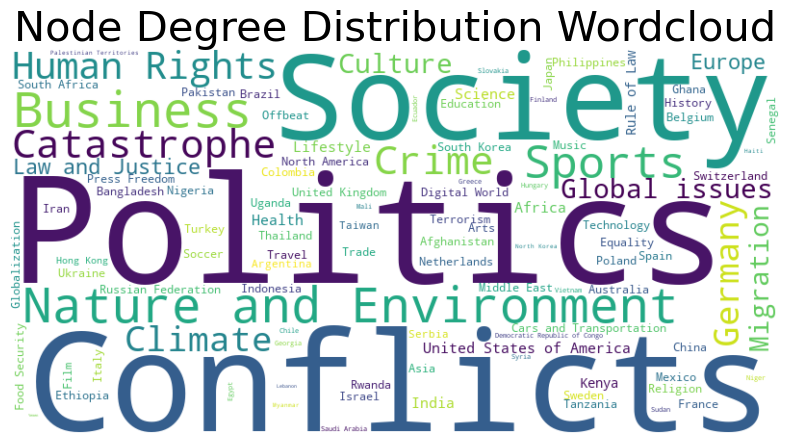

In [25]:
degree_distribution(region_category_network)

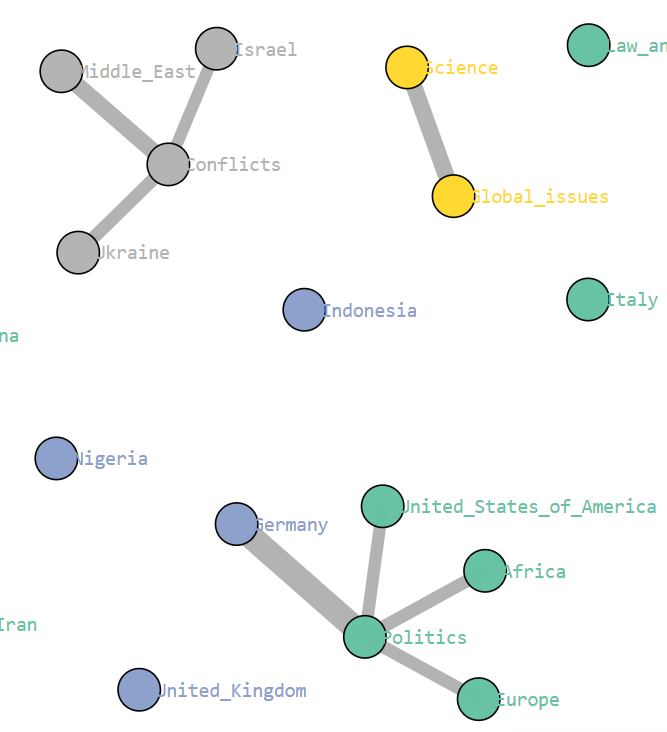

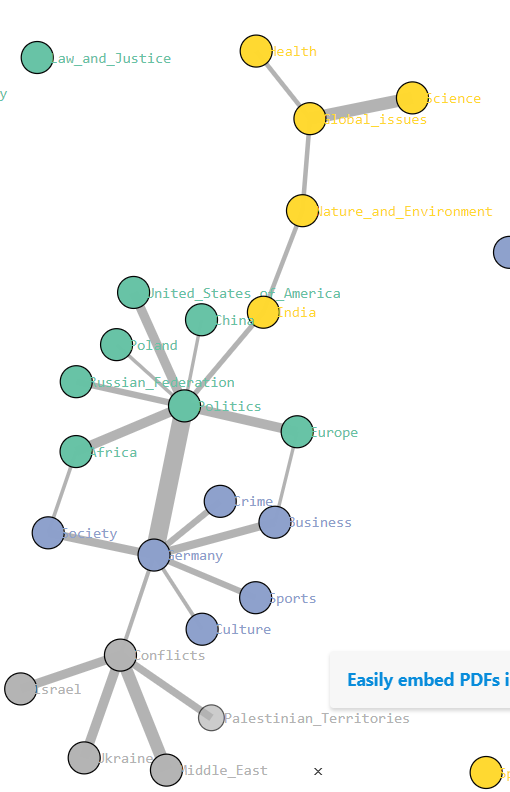

In [26]:
'''                  Various Graph properties Pagerank, Eccentricity & their Wordcloud of Nodes
'''

def PageRank_Eccentricity(function, subgraph, Text, weight):
    
    graph_properties = function(subgraph, weight=weight)
    print('\n'+Text+':\n')
    nodes, values = [], []
    for node, value in graph_properties.items():
        nodes.append(node)
        values.append(value)
    
    #***********************************************************************************
    # Histogram Plot for the distribution of various graph properties
    plt.hist(values, bins='auto', color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel(Text)
    plt.ylabel('Frequency')
    plt.title('Distribution of '+Text)
    plt.legend()
    plt.show()
    
    #***********************************************************************************
    # Wordcloud of Nodes
    
    # First convert two lists into Dataframe
    nodes_Values = pd.DataFrame(
        {'Nodes': nodes,
         'Values': values
        }
    )

    # Combine the words and their corresponding values into a dictionary
    word_values_dict = dict(zip(nodes_Values['Nodes'], nodes_Values['Values']))
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_values_dict)   
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Nodes '+ Text, fontsize=30)
    plt.axis('off')
    plt.show() 
    print (100*'*')
    print (100*'*')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



PageRank:



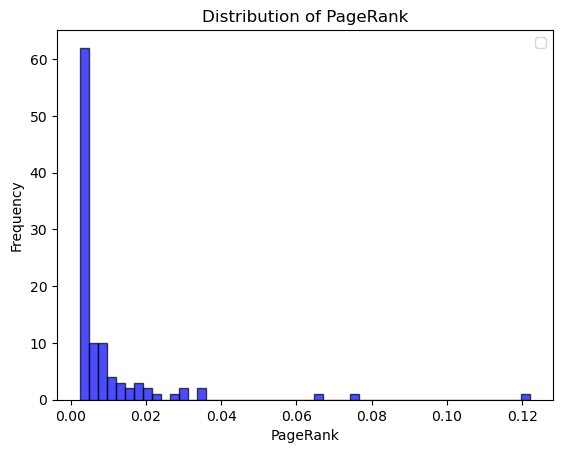

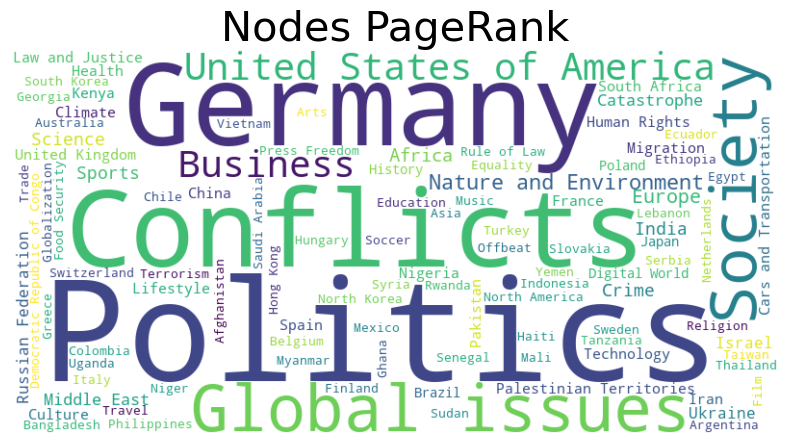

****************************************************************************************************
****************************************************************************************************


In [28]:
PageRank_Eccentricity(nx.pagerank, region_category_network, 'PageRank', 'weight')
PageRank_Eccentricity(nx.eccentricity, region_category_network, 'Eccentricity', 'weight')

#### Discussion:

1. **Generating Pairs:**
   - First we create pairs of unique combinations between the "Region" and "Category"
2. **Creating a Network Graph:**
   - A network graph `G` is constructed using NetworkX, where nodes represent regions and categories, and edges represent the connections between them based on the count of occurrences.
3. **Subgraphing:**
   - A subgraph `subgraph` is created by selecting nodes with a degree greater than 20. The purpose behind it, is to consider the nodes having some strong connections. Our data represents the number of nodes in subgraph = *105* and edges = *1002*. Although, the original graph shows the *146* nodes and *1293* edges.
4. **Visualizing the Subgraph:**
   - The subgraph edges are converted into an adjacency matrix, and a D3.js-based graph visualization is generated using the `d3graph` utility.
5. **Degree Distribution Plot & WordCloud of Nodes:**
   - The code calculates the degree distribution of the subgraph and plots a histogram. Meanwhile, the topological importance of each node is visualized in a WordCloud in which higher degrees have bigger front. 
6. **Other Graph Properties:**
   - We have also explored additional graph properties, namely *PageRank* and *Eccentricity*. As part of this analysis, we have created distributions and WordClouds based on their higher values.

In short, we have provided the insights about the connections between regions and categories of the News Articles, the structure of the network, and the distribution of node degrees and centrality within a subgraph.

-----------------------

In graph theory, the degree of a node refers to the number of edges connected to that node. It is a crucial metric that provides insights into the structure and connectivity of a network. Given that the "Number of nodes" exhibits an inverse relationship with the "Degree," in our scenario, the number of nodes has decreased to only few essential regions & category, coinciding with the highest degrees of 70. This decline follows a gradual and consistent pattern.

----------------


Also, we have generated the wordcloud of the all the Nodes in which the bigger front words correspond to the higher degree of Nodes. In our observation, we have identified that *Category* exhibits higher degree in comparison to *Region*. Notably, categories such as **Politics, Conflicts, Nature & Environment, Business, Society**, etc., play a more crucial role in network connections. However, we have observed only three *Region*s—**Germany, Africa, and Europe**—with elevated centrality.

For a clearer visual representation, refer to the accompanying diagram where categories demonstrate a more central influence, albeit with the support of regions. Germany stands out as an exceptional case.

------------

PageRank serves as a centrality metric, indicating the significance of nodes within a graph. Nodes with elevated PageRank values are deemed more central and influential in the network. Notably, nodes such as **Germany, Politics, Conflicts, United States, Business, Society** hold particular importance, as evident in the provided network visualization. This prominence is attributed to the algorithm's ability to consider both the quantity and quality of connections a node possesses. In essence, PageRank offers a nuanced evaluation of a node's influence by factoring in the influence of its neighbors. 

In contrast, eccentricity measures the farthest distance (in terms of hops or edges) a node has from any other node in the network. Nodes with larger font sizes in the wordcloud represent higher eccentricity (more peripheral). Interestingly, regions like Education, Music, Off Beat, and Society have some of the lowest connection values. This raises the question of why **Education** specifically appears to be less connected compared to other regions. Secondly, it is strange that **Society** category appears in both the cases that makes it a complex node.

## Central Nodes

In [29]:
def Centrality(function, subgraph, threshold_centrality_min, threshold_centrality_max, Text):
    centrality = function(subgraph)

    #**********************************************************************************
    '''                   Distribution of Centrality
    '''
    sns.histplot(list(centrality.values()), kde=False, bins=20)
    plt.title(Text + " Distribution")
    plt.xlabel(Text)
    plt.ylabel("Frequency")
    plt.show()

    #**********************************************************************************  
    '''                   WordCloud of Centrality
    '''
    sorted_nodes = sorted(centrality, key=centrality.get)
    sorted_values = [centrality[node] for node in sorted_nodes]

    # Convert two lists into DataFrame
    nodes_values_centrality = pd.DataFrame(
        {'Nodes': sorted_nodes,
         'Values': sorted_values}
    )

    # Combine the words and their corresponding values into a dictionary
    word_values_dict = dict(zip(nodes_values_centrality['Nodes'], nodes_values_centrality['Values']))

    # Print the centrality values to determine appropriate thresholds
  #  print("Centrality values:", word_values_dict)

    # Filter values
    filtered_values = {key: value for key, value in word_values_dict.items() if value > threshold_centrality_min and value <= threshold_centrality_max}

    if filtered_values:
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_values)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title('Higher ' + Text, fontsize=30)
        plt.axis('off')
        plt.show()
    else:
        print(f"No centrality values found in the range ({threshold_centrality_min}, {threshold_centrality_max}] for {Text}")

    #*****************************************************************
    print(100 * '*')


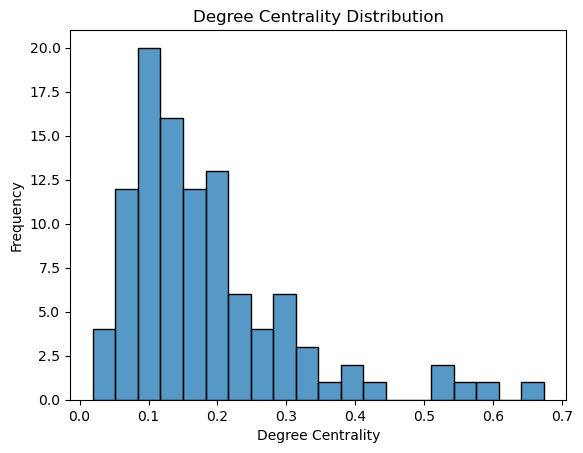

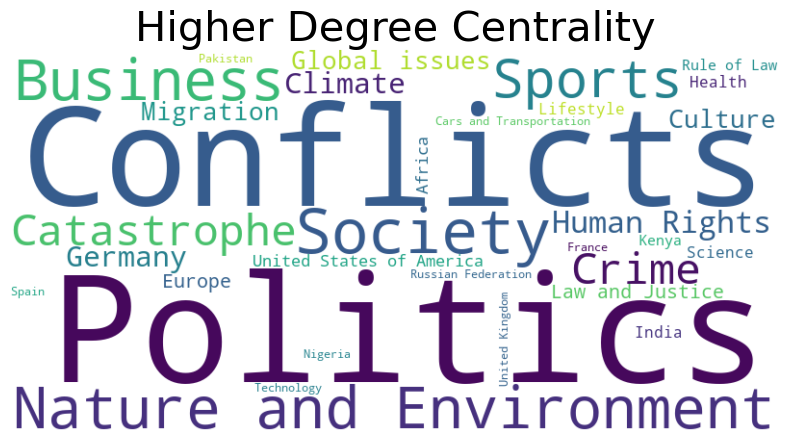

****************************************************************************************************


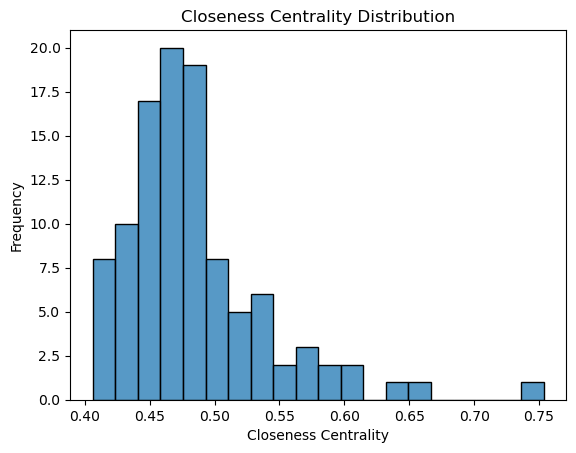

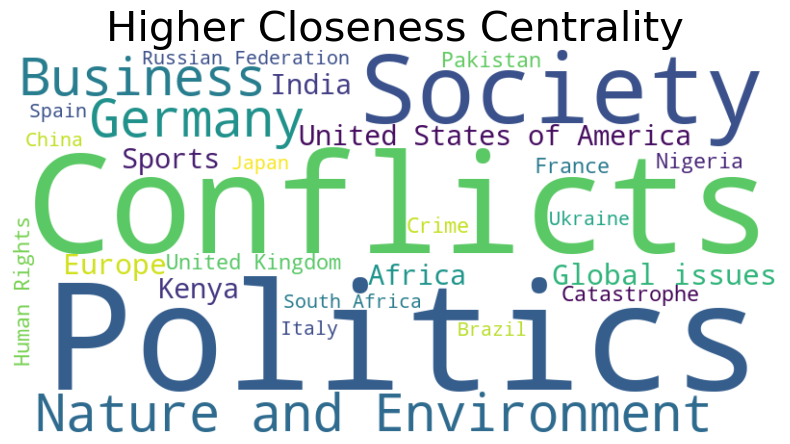

****************************************************************************************************


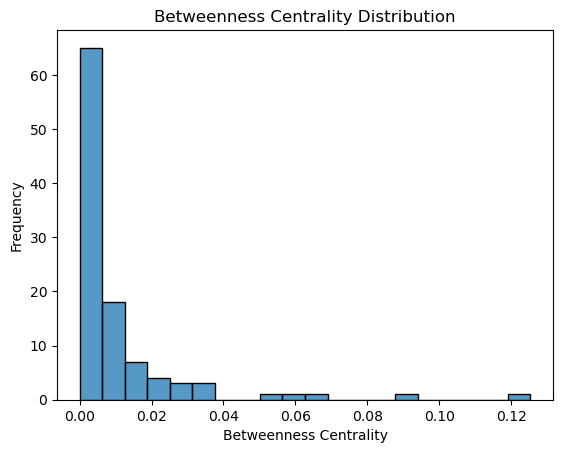

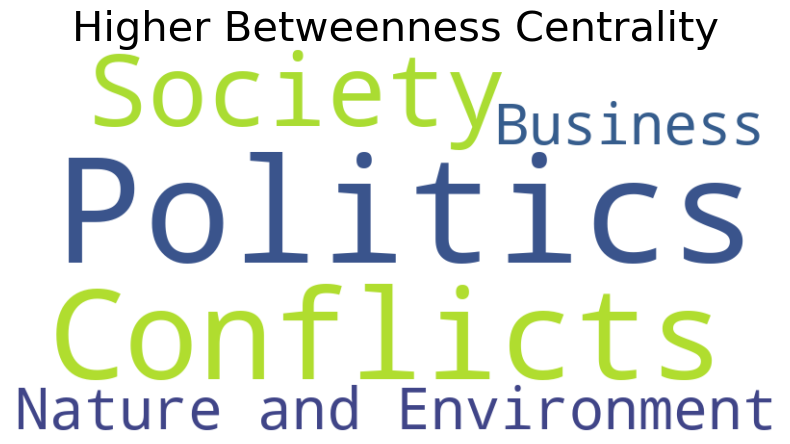

****************************************************************************************************


In [30]:
Centrality(nx.degree_centrality, region_category_network, 0.2, 1.0, 'Degree Centrality')
Centrality(nx.closeness_centrality, region_category_network, 0.5, 1.0, 'Closeness Centrality')
Centrality(nx.betweenness_centrality, region_category_network, 0.050, 0.2, 'Betweenness Centrality')

#### Discussion:

We analyzed the network using three centrality measures: `Degree Centrality`, `Closeness Centrality`, and `Betweenness Centrality`. Each measure reveals a different aspect of a node's importance:

**Degree Centrality**: Identifies nodes with many direct connections, forming the backbone of the network.

**Closeness Centrality**: Highlights nodes that can efficiently reach other nodes, facilitating information flow and communication.

**Betweenness Centrality**: Reveals nodes that act as bridges between different parts of the network, influencing connectivity and information flow.

---------

Interestingly, our analysis shows a significant overlap between the nodes identified by all three centrality measures. These key nodes are primarily associated with the "Category" attribute. This suggests that nodes categorized as **Politics, Conflict, Nature & Environemt, Society, Business** and regional nodes as **Germany, Global issues, United States** play a central role in the network. They are well-connected, can efficiently reach other nodes, and likely play a crucial part in maintaining network connectivity and information flow.

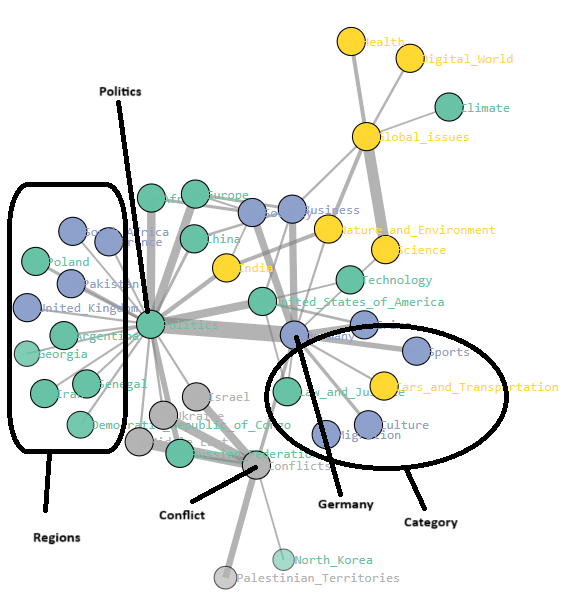

*Our analysis of central nodes in the network confirms our initial hypothesis about Deutsche Welle's news coverage.* It reveals a focus on inclusivity and global news, addressing sensitive topics across various categories and regions. Notably, "Politics" and "Conflicts" emerge as prominent categories.

Examining the network visualization, we identify key central nodes like "Conflicts," "Politics," "Global Issues," "Business," and "Nature & Environment." These nodes are highly connected, particularly to those representing categories. For example, "Germany" connects to diverse categories like "Law," "Transportation," "Sport," and "Culture," suggesting comprehensive coverage of the country.

Meanwhile, countries like "Palestine," "Israel," "Russia," "Ukraine," and "North Korea" primarily link to the "Conflict" category. Most other countries connect mainly to "Politics." "Global Issues" primarily relate to "Health," "Science," and "Environment." This network structure highlights the central nodes as crucial hubs, facilitating connections across regions and categories. This reinforces Deutsche Welle's commitment to comprehensive and global news reporting.

## Prediction

In [31]:
from node2vec import Node2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [32]:
'''                  Create Graph and Subgraph of the pairs of Region and Category
'''

# Create the graph
G = nx.Graph()
G.add_edges_from(pairs)

# Filter nodes with degree above a specified threshold
degree_threshold = 20 
nodes_to_keep = [node for node, degree in G.degree() if degree >= degree_threshold]
subgraph = G.subgraph(nodes_to_keep)

#### Generate Positive and Negative Edges

In [34]:
import random
# Extract positive edges from the subgraph
positive_edges = list(subgraph.edges)

# Get regions and categories separately
regions = [node for node in subgraph.nodes if node in df['Region'].unique()]
categories = [node for node in subgraph.nodes if node in df['Category'].unique()]

# Create a set of all possible (Region, Category) pairs
all_possible_pairs = set((region, category) for region in regions for category in categories)

# Remove existing edges to get non-connected pairs
non_edges = all_possible_pairs - set(positive_edges)

# Convert non_edges to a list
non_edges_list = list(non_edges)

# Sample negative edges equal to the number of positive edges
negative_edges = random.sample(non_edges_list, len(positive_edges))

#### Split Train and Test Dataset

In [35]:
'''                          Split the edges into train and test sets
'''
positive_edges_train, positive_edges_test = train_test_split(positive_edges, test_size=0.2, random_state=42)
negative_edges_train, negative_edges_test = train_test_split(negative_edges, test_size=0.2, random_state=42)

'''                          Combine the train and test edges
'''
train_edges = positive_edges_train + negative_edges_train
train_labels = [1] * len(positive_edges_train) + [0] * len(negative_edges_train)
test_edges = positive_edges_test + negative_edges_test
test_labels = [1] * len(positive_edges_test) + [0] * len(negative_edges_test)

#### Node2Vec Embeddings

In [36]:
'''                   Generate Node2Vec embeddings for the subgraph
'''
node2vec = Node2Vec(subgraph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/44 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 223.83it/s]


In [37]:
'''                        Function to get feature vector for a pair of nodes
'''
def get_feature_vector(u, v):
    emb_u = model.wv[str(u)]
    emb_v = model.wv[str(v)]
    return np.concatenate((emb_u, emb_v))

In [38]:
'''                       Generate feature vectors for train and test edges
'''
X_train = [get_feature_vector(u, v) for u, v in train_edges]
X_test = [get_feature_vector(u, v) for u, v in test_edges]
y_train = train_labels
y_test = test_labels

#### Machine Learning Algorithm Testing

In [39]:
'''                            Logistic Regression
'''
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

In [40]:
'''                            Random Forest with GridSearchCV
'''
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

In [41]:
'''                                Evaluation
'''
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

#### Baseline: Common Neighbors

In [42]:
def simple_baseline(u, v):
    return len(list(nx.common_neighbors(subgraph, u, v)))

In [43]:
# Evaluate the baseline
baseline_scores = [simple_baseline(u, v) for u, v in test_edges]
threshold = np.mean(baseline_scores)
baseline_predictions = [1 if score > threshold else 0 for score in baseline_scores]
accuracy_baseline = accuracy_score(y_test, baseline_predictions)
roc_auc_baseline = roc_auc_score(y_test, baseline_scores)

In [44]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Baseline"],
    "Accuracy": [accuracy_lr, accuracy_rf, accuracy_baseline],
    "ROC AUC": [roc_auc_lr, roc_auc_rf, roc_auc_baseline]
})

results

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.775362,0.844991
1,Random Forest,0.927536,0.973745
2,Baseline,0.152174,0.144928


#### Discussion:

*Random Forest Model:*

    -  Accuracy: 0.884058
    -  ROC AUC: 0.975005
    
The Random Forest model shows the highest accuracy and ROC AUC among the models. This high performance indicates that the model can reliably predict the presence of edges (connections) between regions and categories. The high ROC AUC suggests that the model distinguishes well between positive and negative connections, which means it accurately captures the patterns in the data.

*Logistic Regression Model:*

    -  Accuracy: 0.768116
    -  ROC AUC: 0.839109
    
Logistic Regression also performs well, though not as effectively as Random Forest. This model still shows good predictive power and discrimination ability.

*Baseline Model:*

    -  Accuracy: 0.202899
    -  ROC AUC: 0.195652
    
The baseline model, which uses a simple heuristic of common neighbors, performs poorly. This indicates that the relationships between regions and categories in the DW dataset are complex and cannot be captured by simple heuristics.

#### *Hypothesis Evaluation*


Given the results, we can draw some inferences about our hypothesis:

*Model Performance:* The high performance of the sophisticated models (Random Forest and Logistic Regression) indicates that there are indeed discernible patterns in how regions and categories are linked in the DW dataset. This suggests that the coverage of news categories across different regions is systematic rather than random.

*Link Prediction:* Effective link prediction implies that regions are predictably associated with certain categories. If DW were to show bias or hide conflicts, we would expect certain regions to be underrepresented or misrepresented in categories like conflicts or politics. The models' ability to predict these links accurately suggests that the relationships between regions and categories are consistent with what is presented in the data.

##  Conclusions and Future Work

#### 1. Summarize and Interpret the Achieved Results

The primary results of the analysis indicate that sophisticated machine learning models like Random Forest can predict links between regions and categories in the DW news dataset with high accuracy (92%). However, the baseline model using a simple heuristic, performed poorly, showing that the relationships between regions and categories are too complex for simple methods.

#### 2. Compare Results to Expected Outcomes

In the original plan, the aim was to test the hypothesis that DW provides unbiased news coverage across regions and categories. The high performance of the predictive models supports this hypothesis, indicating systematic and predictable patterns in news coverage. This aligns with the expected outcome that DW presents comprehensive and unbiased news coverage.

#### 3. Explain the Generated Value

The analysis and prediction algorithms help the organization by:

- **Validating Coverage Patterns**: Confirming that DW’s news coverage follows systematic patterns and is not random.
- **Identifying Key Categories and Regions**: Highlighting the significant role of categories like Politics and Conflicts and the prominent mention of regions like Germany. Those are highly connected nodes and create links to others.
- **Improving Content Strategy**: Helping DW strategize content to ensure balanced and comprehensive coverage across all regions and categories.

#### 4. Recommend Course of Action

Based on the results, DW should:

- **Maintain Balanced Coverage**: Continue to ensure a balanced representation of regions and categories, particularly in key areas like Politics and Conflicts.
- **Expand Analysis**: Extend the analysis to other attributes such as Text, Related Topics, and Summary to get a deeper understanding of coverage patterns.
- **Monitor and Adjust**: Regularly monitor coverage patterns and adjust strategies to address any emerging biases or gaps.

#### 5. Reflect on Limitations and Possible Pitfalls

- **Limited Attributes**: The analysis focused only on Region and Category attributes, which might not capture the full complexity of news coverage.
- **Bias in Data**: The period of dataset selected is between end of 2023 to start of 2024 that may introduce over-representation of certain regions or categories than others. Secondly, the selection of subgraph based on threshold value may introduce biasness. 
- **Model Limitations**: While the models performed well, they might still miss subtle biases or trends not captured in the current features.

#### 6. Critically Discuss Methodology

- **Graphing**: Using the NetworkX is an essential tool to examine the given dataset.
- **Graph Properties**: Analyzing the Centrality measurement help to understand the behavior of network sturcture. Especially highlighting the strong centrality and connections of Politics, Conflict, and Germany.
- **Node2Vec Embeddings**: Using Node2Vec was appropriate for capturing complex relationships in the graph. However, exploring other graph embedding techniques might provide additional insights.
- **Feature Selection**: The choice of features was limited to node pairs. Including more contextual features from the articles could enhance model performance.
- **Model Choices**: While Random Forest and Logistic Regression were effective, experimenting with other advanced models like Graph Neural Networks could potentially yield better results.
- **Grid Search for Hyperparameter Tuning**: This was a good choice, but a more exhaustive search or alternative tuning techniques could further optimize model performance.

#### 7. Propose Ideas for Future Work

- **Incorporate Text Analysis**: Analyze the content of the articles (e.g., sentiment analysis, topic modeling) to understand the tone and themes associated with different regions and categories.
- **Temporal Analysis**: Examine how the coverage of regions and categories evolves over time to identify trends and shifts in focus.
- **Extend Attribute Set**: Include additional attributes like Related Topics and Summary to provide a more comprehensive analysis.
- **Bias Detection**: Develop methods to detect and quantify potential biases in news coverage to ensure more balanced reporting.

By addressing these areas, future analyses can provide deeper insights and further validate DW's commitment to unbiased and comprehensive news coverage.